In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

import warnings
warnings.filterwarnings("ignore")

In [37]:
data = pd.read_excel('pdn_hse_with_flags.xlsx')

data.head()

,ID loan,ID client,LoanSum,LoanTerm,pdn,FPD10,FPD30,NPL10,NPL30,old_user
0,1,1000,6000,25,11862.10,0,0,0,0,0
1,2,1001,9900,30,70.48,0,0,0,0,1
2,3,1002,9900,30,58.60,0,0,0,0,1
3,4,1003,5000,25,679.65,1,0,1,1,0
4,5,1004,6000,20,875.48,1,1,1,1,0


In [38]:
data.columns

Index(['ID loan', 'ID client', 'LoanSum', 'LoanTerm', 'pdn', 'FPD10', 'FPD30',
       'NPL10', 'NPL30', 'old_user'],
      dtype='object')

In [39]:
data.shape

(5346, 10)

In [40]:
data.pdn.describe()

count      5346.000000
mean        798.740022
std        6459.111841
min           5.930000
25%         119.295000
50%         253.765000
75%         562.385000
max      406416.520000
Name: pdn, dtype: float64

<Axes: xlabel='pdn'>

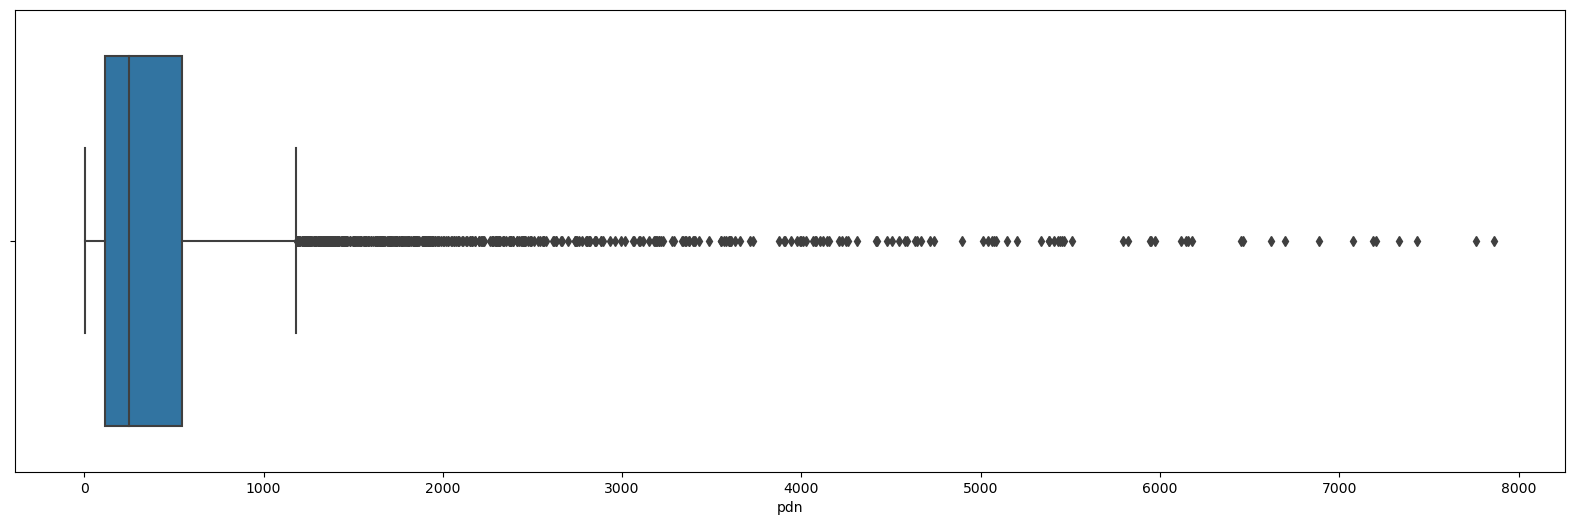

In [41]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = data[data.pdn < 8000].pdn)

<Axes: xlabel='pdn'>

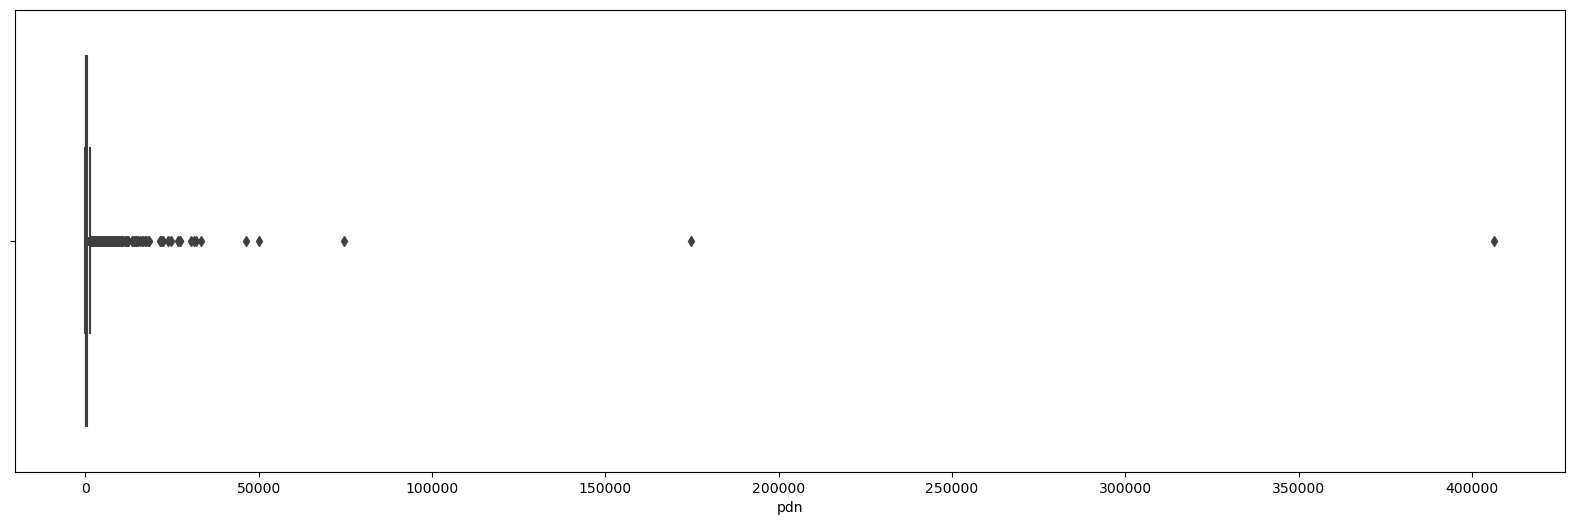

In [42]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = data.pdn)

<Axes: xlabel='pdn', ylabel='Density'>

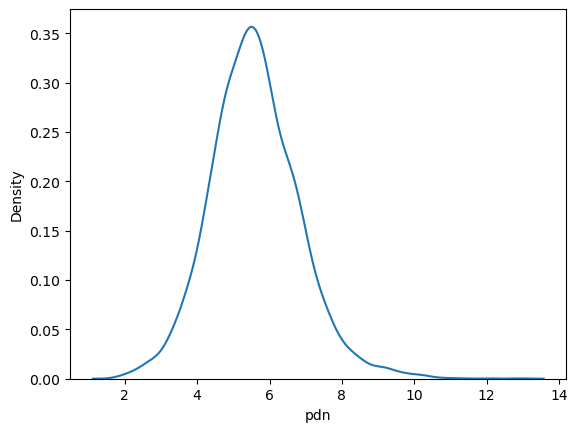

In [43]:
sns.kdeplot(np.log(data.pdn))

In [53]:
model = sm.ols(data=data, formula='np.log(pdn) ~ LoanSum + LoanTerm + FPD10 + NPL10 + NPL30 + old_user').fit()

print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.179     
Dependent Variable: np.log(pdn)      AIC:                16344.3955
Date:               2024-03-06 11:21 BIC:                16390.4843
No. Observations:   5346             Log-Likelihood:     -8165.2   
Df Model:           6                F-statistic:        195.7     
Df Residuals:       5339             Prob (F-statistic): 3.62e-226 
R-squared:          0.180            Scale:              1.2437    
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       6.3579    0.0588  108.1590  0.0000   6.2426   6.4731
LoanSum        -0.0001    0.0000  -22.6642  0.0000  -0.0001  -0.0001
LoanTerm        0.0093    0.0023    4.0254  0.0001   0.0048   0.0139
FPD10          -0.2366    0.0577   -4.1006  0.0000  -0.3497 

In [64]:
model = sm.ols(data=data, formula='np.log(pdn) ~ LoanSum*old_user + LoanTerm + LoanTerm + FPD10 + NPL10 + NPL30').fit()

print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.182     
Dependent Variable: np.log(pdn)      AIC:                16330.5467
Date:               2024-03-06 11:23 BIC:                16383.2195
No. Observations:   5346             Log-Likelihood:     -8157.3   
Df Model:           7                F-statistic:        170.5     
Df Residuals:       5338             Prob (F-statistic): 2.00e-228 
R-squared:          0.183            Scale:              1.2403    
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           6.5775   0.0806  81.6539 0.0000  6.4195  6.7354
LoanSum            -0.0001   0.0000 -14.8896 0.0000 -0.0001 -0.0001
old_user           -0.8602   0.0868  -9.9100 0.0000 -1.0304 -0.6901
LoanSum:old_user    0.0000   0.0000   3.9810 0.0001  0.0000  0.000